# MLB mock report

In [3]:
import pandas as pd
import seaborn as sns

from IPython.display import Image, display
from datetime import datetime, timedelta

from os import listdir
from os.path import isfile, join

from statsapi_extraction_script import OUTPUT_DETAILS
from statsapi_parameters_script import (
    DATA_FILE_LOCATION,
    LEAGUE_NAME_LOCATION,
    OUTPUT_FILE_LOCATION,
)


ALL_FILES = [
    f for f in listdir(OUTPUT_FILE_LOCATION) if isfile(join(OUTPUT_FILE_LOCATION, f))
]
TODAY_FILES = [file for file in ALL_FILES if OUTPUT_DETAILS in file]
TODAY_FILES_PATHS = [OUTPUT_FILE_LOCATION + file for file in TODAY_FILES]

c_map_red = sns.light_palette("red", as_cmap=True)
c_map_blue = sns.light_palette("blue", as_cmap=True)

In [14]:
TODAY_DATE_TIME_EXECUTION = datetime.today().strftime("%Y-%m-%d")
LAST_WEEK_DATE_TIME_EXECUTION = (datetime.today() - timedelta(days=10)).strftime(
    "%Y-%m-%d"
)

with open(LEAGUE_NAME_LOCATION, "r") as text_file:
    LEAGUE_NAME = text_file.readline().strip()

TODAY_BATTER_DATA_FILE_NAME = (
    f"{DATA_FILE_LOCATION}{LEAGUE_NAME}_{TODAY_DATE_TIME_EXECUTION}_batter_stats_df.csv"
)
LAST_WEEK_BATTER_DATA_FILE_NAME = f"{DATA_FILE_LOCATION}{LEAGUE_NAME}_{LAST_WEEK_DATE_TIME_EXECUTION}_batter_stats_df.csv"


league_name_dict = {
    "american_league": "American League",
    "national_league": "National League",
}

In [15]:
print(f"Report date: {TODAY_DATE_TIME_EXECUTION}")
print(f"League name: {league_name_dict[LEAGUE_NAME]}")

Report date: 2023-06-04
League name: National League


## League standings

Time series evolution of number of wins and win-total ratio:

In [16]:
TimeSeriesStandingsFiles = [ele for ele in TODAY_FILES_PATHS if "standings" in ele]
for imageName in TimeSeriesStandingsFiles:
    display(Image(filename=imageName))

## Batting summary

Time series evolution of home runs and obp:

In [17]:
TimeSeriesBatterFiles = [
    ele for ele in TODAY_FILES_PATHS if "time_series_batter" in ele
]
for imageName in TimeSeriesBatterFiles:
    display(Image(filename=imageName))

In [18]:
today_batting_stats_df = pd.read_csv(TODAY_BATTER_DATA_FILE_NAME, index_col=0)
last_week_batting_stats_df = pd.read_csv(LAST_WEEK_BATTER_DATA_FILE_NAME, index_col=0)

In [19]:
# batting stats analysis
batting_var_list = [
    "strikeOutsperplateAppearance",
    "homeRunsperplateAppearance",
    "rbiperplateAppearance",
]

batting_stats_most_dict = {}
batting_stats_least_dict = {}

for var in batting_var_list:
    batting_stats_most_dict[var] = (
        today_batting_stats_df[["playername", var]]
        .sort_values(by=var, ascending=False)
        .head(+10)
    )
    batting_stats_least_dict[var] = (
        today_batting_stats_df[["playername", var]]
        .sort_values(by=var, ascending=True)
        .head(+10)
    )

###  Runs batted in (RBI)

Who is really 🔥💥 ?

In [20]:
batting_stats_most_dict["rbiperplateAppearance"].round(5).style.background_gradient(
    c_map_red
)

,playername,rbiperplateAppearance
502110,J.D. Martinez,0.215050
669357,Nolan Gorman,0.210530
641584,Jake Fraley,0.192510
571970,Max Muncy,0.190050
669221,Sean Murphy,0.190000
624413,Pete Alonso,0.182540
669257,Will Smith,0.170450
572761,Matt Carpenter,0.169010
666971,Gurriel Jr.,0.161290
621566,Matt Olson,0.160920


And who is not 🧊🐢 ?

In [21]:
var = "rbiperplateAppearance"

(
    batting_stats_least_dict[var]
    .round(5)
    .style.background_gradient(
        gmap=-1 * batting_stats_least_dict[var][var], cmap=c_map_blue, subset=[var]
    )
)

,playername,rbiperplateAppearance
516416,Jean Segura,0.041880
500743,Miguel Rojas,0.047240
542932,Jon Berti,0.054950
543592,Austin Nola,0.056910
642086,Dominic Smith,0.060340
671739,Harris II,0.061540
607208,Trea Turner,0.062500
547180,Bryce Harper,0.067800
663757,Trent Grisham,0.071090
643446,Jeff McNeil,0.071430


Who to watch? Biggest improvement from last week:

In [22]:
var = "rbiperplateAppearance"

tw_df = (
    today_batting_stats_df[["playername", var]]
    .copy()
    .rename({var: var + "TW"}, axis="columns")
)
lw_df = (
    last_week_batting_stats_df[["playername", var]]
    .copy()
    .rename({var: var + "LW"}, axis="columns")
)

tw_df = tw_df[~tw_df.index.duplicated(keep="first")]
lw_df = lw_df[~lw_df.index.duplicated(keep="first")]

common_indices = tw_df.index.intersection(lw_df.index)

lw_df = lw_df.loc[common_indices, :].sort_index()
tw_df = tw_df.loc[common_indices, :].sort_index()

tw_df[var + "difference"] = tw_df[var + "TW"] - lw_df[var + "LW"]

(
    tw_df[["playername", var + "difference"]]
    .sort_values(by=var + "difference", ascending=False)
    .head(+10)
    .round(5)
    .style.background_gradient(c_map_red)
)

,playername,rbiperplateAppearancedifference
641857,Ryan McMahon,0.044680
665487,Tatis Jr.,0.040630
663697,Jonathan India,0.028680
663647,Ke'Bryan Hayes,0.024510
600869,Jeimer Candelario,0.023140
676480,Jose Barrero,0.022210
592192,Mark Canha,0.021770
650333,Luis Arraez,0.020860
661388,William Contreras,0.018820
660688,Keibert Ruiz,0.018810


###  Homeruns (HRs)

Who is really 🔥💥 ?

In [23]:
batting_stats_most_dict["homeRunsperplateAppearance"].round(
    5
).style.background_gradient(c_map_red)

,playername,homeRunsperplateAppearance
571970,Max Muncy,0.081450
624413,Pete Alonso,0.079370
446334,Evan Longoria,0.076920
621550,Patrick Wisdom,0.075680
624585,Jorge Soler,0.070540
502110,J.D. Martinez,0.069890
669357,Nolan Gorman,0.066990
621566,Matt Olson,0.065130
682626,Francisco Alvarez,0.064520
542303,Marcell Ozuna,0.064330


And who is not 🧊🐢 ?

In [24]:
var = "homeRunsperplateAppearance"

(
    batting_stats_least_dict[var]
    .round(5)
    .style.background_gradient(
        gmap=-1 * batting_stats_least_dict[var][var], cmap=c_map_blue, subset=[var]
    )
)

,playername,homeRunsperplateAppearance
605612,Harold Castro,0.000000
676701,Alan Trejo,0.000000
516416,Jean Segura,0.000000
668942,Josh Rojas,0.000000
595978,Austin Hedges,0.000000
500743,Miguel Rojas,0.000000
642086,Dominic Smith,0.004310
650333,Luis Arraez,0.004500
656413,Stuart Fairchild,0.006800
543592,Austin Nola,0.008130


Who to watch? Biggest improvement from last week:

In [25]:
var = "homeRunsperplateAppearance"

tw_df = (
    today_batting_stats_df[["playername", var]]
    .copy()
    .rename({var: var + "TW"}, axis="columns")
)
lw_df = (
    last_week_batting_stats_df[["playername", var]]
    .copy()
    .rename({var: var + "LW"}, axis="columns")
)

tw_df = tw_df[~tw_df.index.duplicated(keep="first")]
lw_df = lw_df[~lw_df.index.duplicated(keep="first")]

common_indices = tw_df.index.intersection(lw_df.index)

lw_df = lw_df.loc[common_indices, :].sort_index()
tw_df = tw_df.loc[common_indices, :].sort_index()

tw_df[var + "difference"] = tw_df[var + "TW"] - lw_df[var + "LW"]

(
    tw_df[["playername", var + "difference"]]
    .sort_values(by=var + "difference", ascending=False)
    .head(+10)
    .round(5)
    .style.background_gradient(c_map_red)
)

,playername,homeRunsperplateAppearancedifference
641857,Ryan McMahon,0.017250
669261,Jack Suwinski,0.014620
663647,Ke'Bryan Hayes,0.012550
661388,William Contreras,0.011990
660688,Keibert Ruiz,0.011020
502110,J.D. Martinez,0.010290
665487,Tatis Jr.,0.009870
663697,Jonathan India,0.009300
592192,Mark Canha,0.008130
605141,Mookie Betts,0.007900


###  Strike-outs

Remember, unlike runs batted in and home-runs, strike-outs are bad! You cannot score runs if you do not put the ball in play!

Who is really 🔥💥 ?

In [26]:
var = "strikeOutsperplateAppearance"

(
    batting_stats_least_dict[var].style.background_gradient(
        gmap=-1 * batting_stats_least_dict[var][var], cmap=c_map_red, subset=[var]
    )
)

,playername,strikeOutsperplateAppearance
650333,Luis Arraez,0.049550
660688,Keibert Ruiz,0.078049
643446,Jeff McNeil,0.084034
669257,Will Smith,0.096591
676475,Alec Burleson,0.103896
663538,Nico Hoerner,0.106667
500743,Miguel Rojas,0.110236
621028,Kevin Newman,0.118421
493329,Yuli Gurriel,0.124183
671277,Luis Garcia,0.127854


And who is not 🧊🐢 ?

In [27]:
batting_stats_most_dict["strikeOutsperplateAppearance"].style.background_gradient(
    c_map_blue
)

,playername,strikeOutsperplateAppearance
686668,Brenton Doyle,0.359223
621550,Patrick Wisdom,0.356757
681546,James Outman,0.352657
621035,Chris Taylor,0.347222
666165,Blake Sabol,0.346939
669261,Jack Suwinski,0.336957
543063,Brandon Crawford,0.327731
446334,Evan Longoria,0.317308
572761,Matt Carpenter,0.316901
656448,Stone Garrett,0.314286


Who to watch? Biggest improvement from last week:

In [28]:
var = "strikeOutsperplateAppearance"

tw_df = (
    today_batting_stats_df[["playername", var]]
    .copy()
    .rename({var: var + "TW"}, axis="columns")
)
lw_df = (
    last_week_batting_stats_df[["playername", var]]
    .copy()
    .rename({var: var + "LW"}, axis="columns")
)

tw_df = tw_df[~tw_df.index.duplicated(keep="first")]
lw_df = lw_df[~lw_df.index.duplicated(keep="first")]

common_indices = tw_df.index.intersection(lw_df.index)

lw_df = lw_df.loc[common_indices, :].sort_index()
tw_df = tw_df.loc[common_indices, :].sort_index()

tw_df[var + "difference"] = tw_df[var + "TW"] - lw_df[var + "LW"]

output_df = (
    tw_df[["playername", var + "difference"]]
    .sort_values(by=var + "difference", ascending=True)
    .head(+10)
)

(
    output_df.round(5).style.background_gradient(
        gmap=-1 * output_df[var + "difference"],
        cmap=c_map_red,
        subset=[var + "difference"],
    )
)

,playername,strikeOutsperplateAppearancedifference
621550,Patrick Wisdom,-0.034550
663757,Trent Grisham,-0.022060
607208,Trea Turner,-0.021190
621035,Chris Taylor,-0.020780
641857,Ryan McMahon,-0.019930
608841,Joey Meneses,-0.019400
668715,Spencer Steer,-0.019120
621566,Matt Olson,-0.017890
680977,Brendan Donovan,-0.017680
669743,Alex Call,-0.017680


## Batting stats charts

A short explanation of the meaning of each chart, in order. If not explicitly mentioned, the variables are normalized by the number of plate appearances:

1. y-var: Normalized ops (obp + slugging),  x-var: StrikeOutsPerPlateAppearance - In theory, these variables should be slightly negatively (i.e, inversely) correlated. Roughly speaking, aggressive batters, which hit for power often, are more likely to strike out. This chart is relevant to determine outliers. Excellent sluggers will appear above the rest of the players, while maintaining a low strikeOutperPlateAppearance.

2. y-var: Base on Balls (i.e, walks),  x-var: StrikeOuts - In theory, these variables should be negatively (i.e, inversely) correlated. Roughly speaking, aggressive batters which attack the ball thrown by the pitcher more often should walk fewer times because they are more likely to attack balls outside the strikezone, for which they could earn a walk.

3. y-var: Normalized obp,  x-var: Difference between StrikeOuts and BaseOnBalls - In theory, these variables should be inversely correlated, because to obtain a large on base percentage (obp), the batter must avoid getting striked out. This chart is particularly useful to determine players which are extremely good at hitting for contact - those with an ops above league average and a negative difference between StrikeOuts and Base On Balls - i.e, the top left corner of the chart). These might not score a lot of homeRuns, but they get on base very often and allow their team the possibility to score runs.

4. y-var: homeRuns,  x-var: StrikeOuts - In theory, these variables should be positively correlated. Following 1., aggressive batters try to generate powerful contact with the ball more often. They will receive more homeRuns at the expense of more StrikeOuts. Elite players should be placed in the top half of the chart, towards the left.

5. y-var: totalBases , x-var: hits, both as a league z-score - These variables are proportional - to score a single, double or triple, the batter must hit the ball. On average, the batter will receive one base per hit. This chart is relevant to determine outliers. That is, Aaron Judge is an absolute freak!

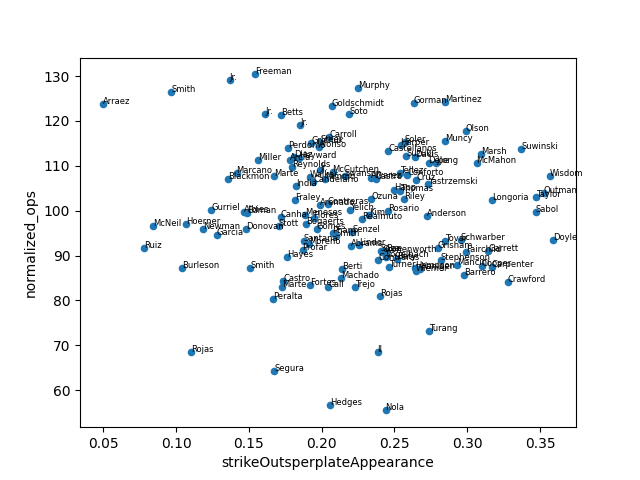

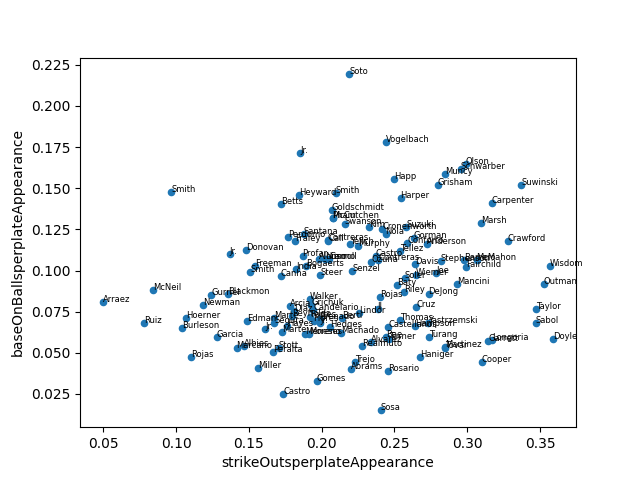

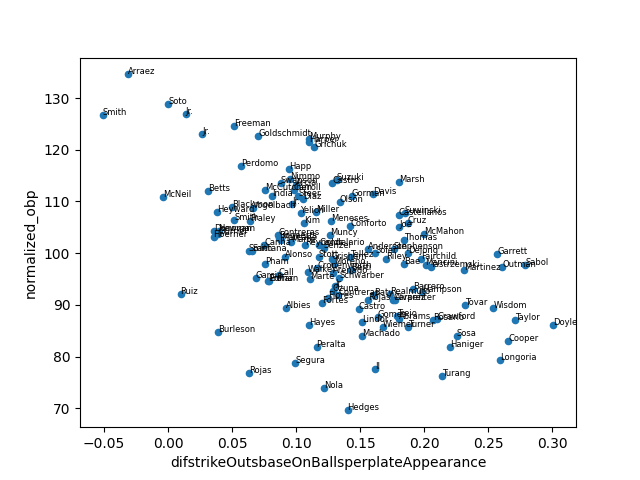

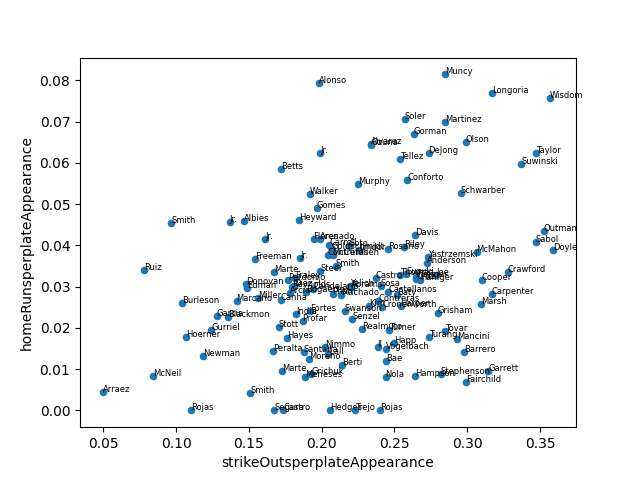

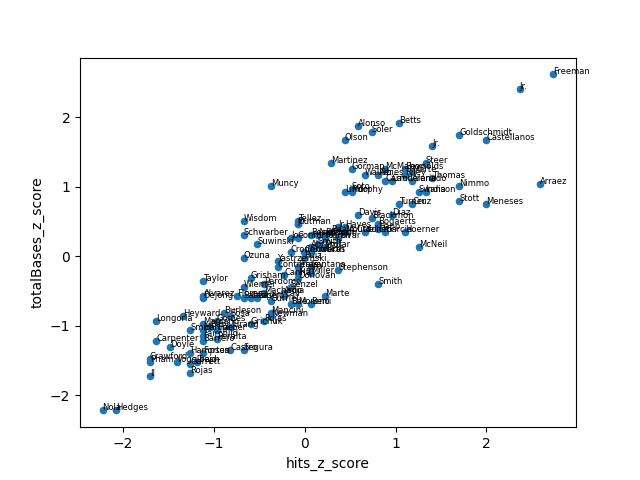

In [29]:
NonTimeSeriesFiles = [ele for ele in TODAY_FILES_PATHS if "time" not in ele]

plot_var_list = [
    "strikeOutsperplateAppearance_normalized_ops",
    "strikeOutsperplateAppearance_baseOnBallsperplateAppearance",
    "difstrikeOutsbaseOnBallsperplateAppearance_normalized_obp",
    "strikeOutsperplateAppearance_homeRunsperplateAppearance",
    "hits_z_score_totalBases_z_score",
]

for variable in plot_var_list:
    var_check_list = [True if variable in ele else False for ele in NonTimeSeriesFiles]

    display(Image(filename=NonTimeSeriesFiles[var_check_list.index(True)]))